In [1]:
# Import Packages

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

In [61]:
# Load Data

In [62]:
drivers = pd.read_csv('drivers.csv')
races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')
sprint = pd.read_csv('sprint_results.csv')
laptimes = pd.read_csv('lap_times.csv')
constructors = pd.read_csv('constructors.csv')


In [63]:
# Merge Datasets

In [64]:
results.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')

In [65]:
races.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')

In [66]:
drivers.columns

Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')

In [67]:
constructors.columns

Index(['constructorId', 'constructorRef', 'name', 'nationality', 'url'], dtype='object')

In [68]:
df = pd.merge(results, races[['raceId', 'year', 'name', 'round']], on = 'raceId', how = 'left')

In [69]:
df = pd.merge(df, drivers[['driverId', 'driverRef', 'nationality']], on = 'driverId', how = 'left')

In [70]:
df = pd.merge(df, constructors[['constructorId', 'name', 'nationality']], on = 'constructorId', how = 'left')

In [71]:
# Drop Columns

In [72]:
df.drop(['number', 'position', 'positionText', 'fastestLap', 'statusId', 'resultId', 'driverId', 'constructorId'], axis = 1, inplace = True)

In [73]:
# Rename Columns

In [74]:
df.rename(columns = {'rank':'fastestLap_rank', 'name_x':'gpName', 'nationality_x':'driverNationality', 'name_y':'constructorName', 'nationality_y':'constructorNationality', 'driverRef':'driver'}, inplace = True)

In [75]:
# Re-arrange Columns

In [76]:
df = df[['year', 'gpName', 'round', 'driver', 'constructorName', 'grid', 'positionOrder', 'points', 'time','milliseconds','fastestLap_rank', 'fastestLapTime', 'fastestLapSpeed', 'driverNationality', 'constructorNationality']]

In [77]:
df.columns

Index(['year', 'gpName', 'round', 'driver', 'constructorName', 'grid',
       'positionOrder', 'points', 'time', 'milliseconds', 'fastestLap_rank',
       'fastestLapTime', 'fastestLapSpeed', 'driverNationality',
       'constructorNationality'],
      dtype='object')

In [78]:
# Drop 2022 Season

In [79]:
df = df[df['year']!=2022]

In [80]:
# Sort Values

In [126]:
 df = df.sort_values(by = ['year', 'round', 'positionOrder'], ascending = [False, True, True])

In [127]:
# Replace \N Values in time col

In [128]:
df.time.replace('\\N',np.nan,inplace = True)
df.milliseconds.replace('\\N',np.nan,inplace = True)
df.fastestLap_rank.replace('\\N',np.nan,inplace = True)
df.fastestLapSpeed.replace('\\N',np.nan,inplace = True)
df.fastestLapTime.replace('\\N',np.nan,inplace = True)

In [129]:
# Change Datatypes

In [130]:
df.fastestLap_rank = df.fastestLap_rank.astype(float)
df.fastestLapSpeed = df.fastestLapSpeed.astype(float)
df.milliseconds = df.milliseconds.astype(float)

In [131]:
# Reset Index

In [132]:
df.reset_index(drop = True, inplace = True)

In [133]:
df.shape

(25400, 15)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25400 entries, 0 to 25399
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    25400 non-null  int64  
 1   gpName                  25400 non-null  object 
 2   round                   25400 non-null  int64  
 3   driver                  25400 non-null  object 
 4   constructorName         25400 non-null  object 
 5   grid                    25400 non-null  int64  
 6   positionOrder           25400 non-null  int64  
 7   points                  25400 non-null  float64
 8   time                    6809 non-null   object 
 9   milliseconds            6808 non-null   float64
 10  fastestLap_rank         7151 non-null   float64
 11  fastestLapTime          6953 non-null   object 
 12  fastestLapSpeed         6953 non-null   float64
 13  driverNationality       25400 non-null  object 
 14  constructorNationality  25400 non-null

In [137]:
# Plot Template

In [142]:
sb.set_palette('Set3')
plt.rcParams['figure.figsize'] = 10,6

In [143]:
# GP Winners

In [147]:
driver_winners = df.loc[df['positionOrder'] == 1].groupby('driver')['positionOrder'].count().sort_values(ascending = False).to_frame().reset_index()

In [148]:
# Barplot

([], <a list of 0 Text major ticklabel objects>)

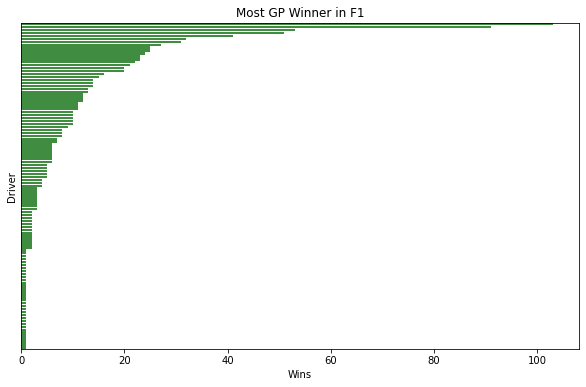

In [152]:
sb.barplot(data = driver_winners, y = 'driver', x = 'positionOrder', color = 'green', alpha = 0.8)
plt.title('Most GP Winner in F1')
plt.ylabel('Driver')
plt.xlabel('Wins')
plt.yticks([])

In [ ]:
# Top 10 Drivers

In [178]:
Top10D = driver_winners.head(10)
Top10D

,driver,positionOrder
0,hamilton,103
1,michael_schumacher,91
2,vettel,53
3,prost,51
4,senna,41
5,alonso,32
6,mansell,31
7,stewart,27
8,lauda,25
9,clark,25


Text(0.5, 0, 'GP Wins')

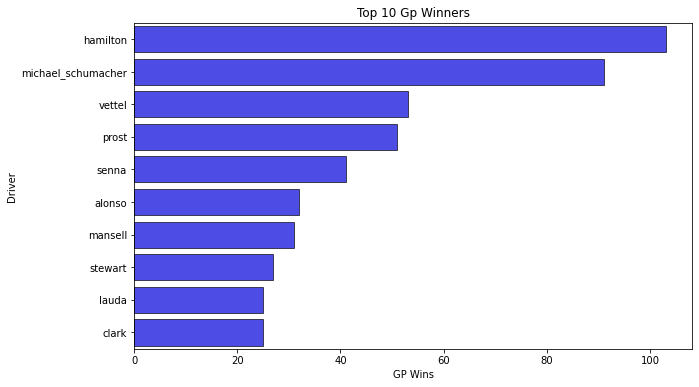

In [184]:
sb.barplot(data = Top10D, y = 'driver', x = 'positionOrder', color = 'blue', alpha = 0.8, linewidth = 0.8, edgecolor = 'black')
plt.title('Top 10 Gp Winners')
plt.ylabel('Driver')
plt.xlabel('GP Wins')

In [185]:
# Constructors Winners

In [186]:
constructor_winners = df.loc[df['positionOrder'] == 1].groupby('constructorName')['positionOrder'].count().sort_values(ascending = False).to_frame().reset_index()

In [187]:
#Barplot

([], <a list of 0 Text major ticklabel objects>)

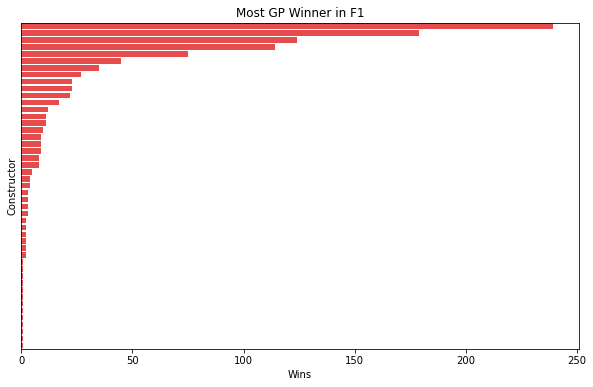

In [188]:
sb.barplot(data = constructor_winners, y = 'constructorName', x = 'positionOrder', color = 'red', alpha = 0.8)
plt.title('Most GP Winner in F1')
plt.ylabel('Constructor')
plt.xlabel('Wins')
plt.yticks([])

In [189]:
# Top 10 Constructors

In [190]:
Top10C = constructor_winners.head(10)
Top10C

,constructorName,positionOrder
0,Ferrari,239
1,McLaren,179
2,Mercedes,124
3,Williams,114
4,Red Bull,75
5,Team Lotus,45
6,Renault,35
7,Benetton,27
8,Tyrrell,23
9,Brabham,23


Text(0.5, 0, 'GP Wins')

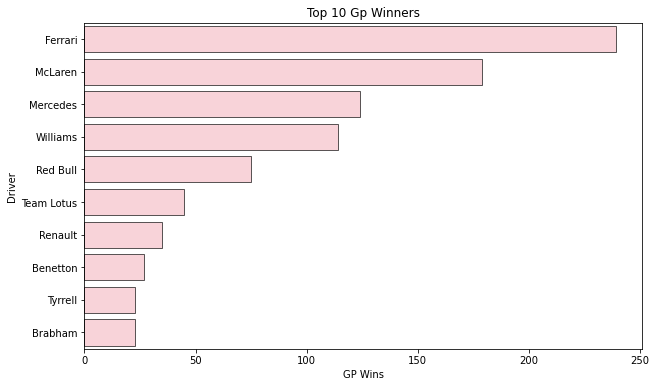

In [192]:
sb.barplot(data = Top10C, y = 'constructorName', x = 'positionOrder', color = 'pink', alpha = 0.8, linewidth = 0.8, edgecolor = 'black')
plt.title('Top 10 Gp Winners')
plt.ylabel('Driver')
plt.xlabel('GP Wins')

In [249]:
# Regression Plot
# Impact of Position Change in 2021

In [255]:
df_2021 = df[df['grid'] !=0]

In [267]:
df_2021 = df[df['year'] == 2021]

Text(0.5, 0, 'Start')

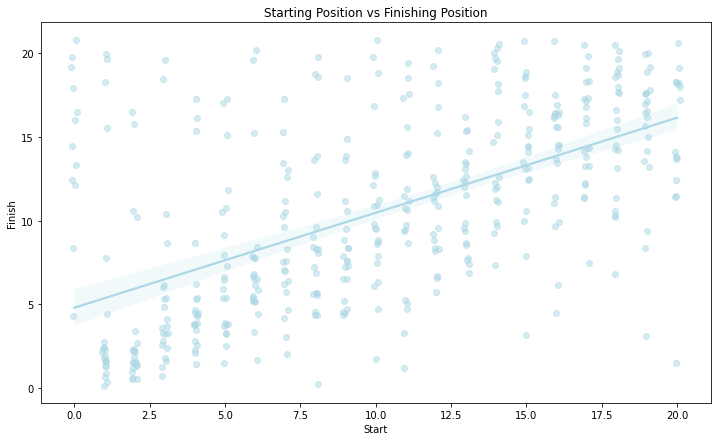

In [297]:
plt.figure(figsize = [12, 7])
sb.regplot(data = df_2021, x = 'grid', y = 'positionOrder', x_jitter = 0.1, y_jitter = 0.9, color = 'lightblue', scatter_kws = {'alpha' : 1/2})
plt.title('Starting Position vs Finishing Position')
plt.ylabel('Finish')
plt.xlabel('Start')

In [298]:
# Speed of the cars

Text(0.5, 0.98, 'Average speed amongst all teams during the fastest lap at individual GPs')

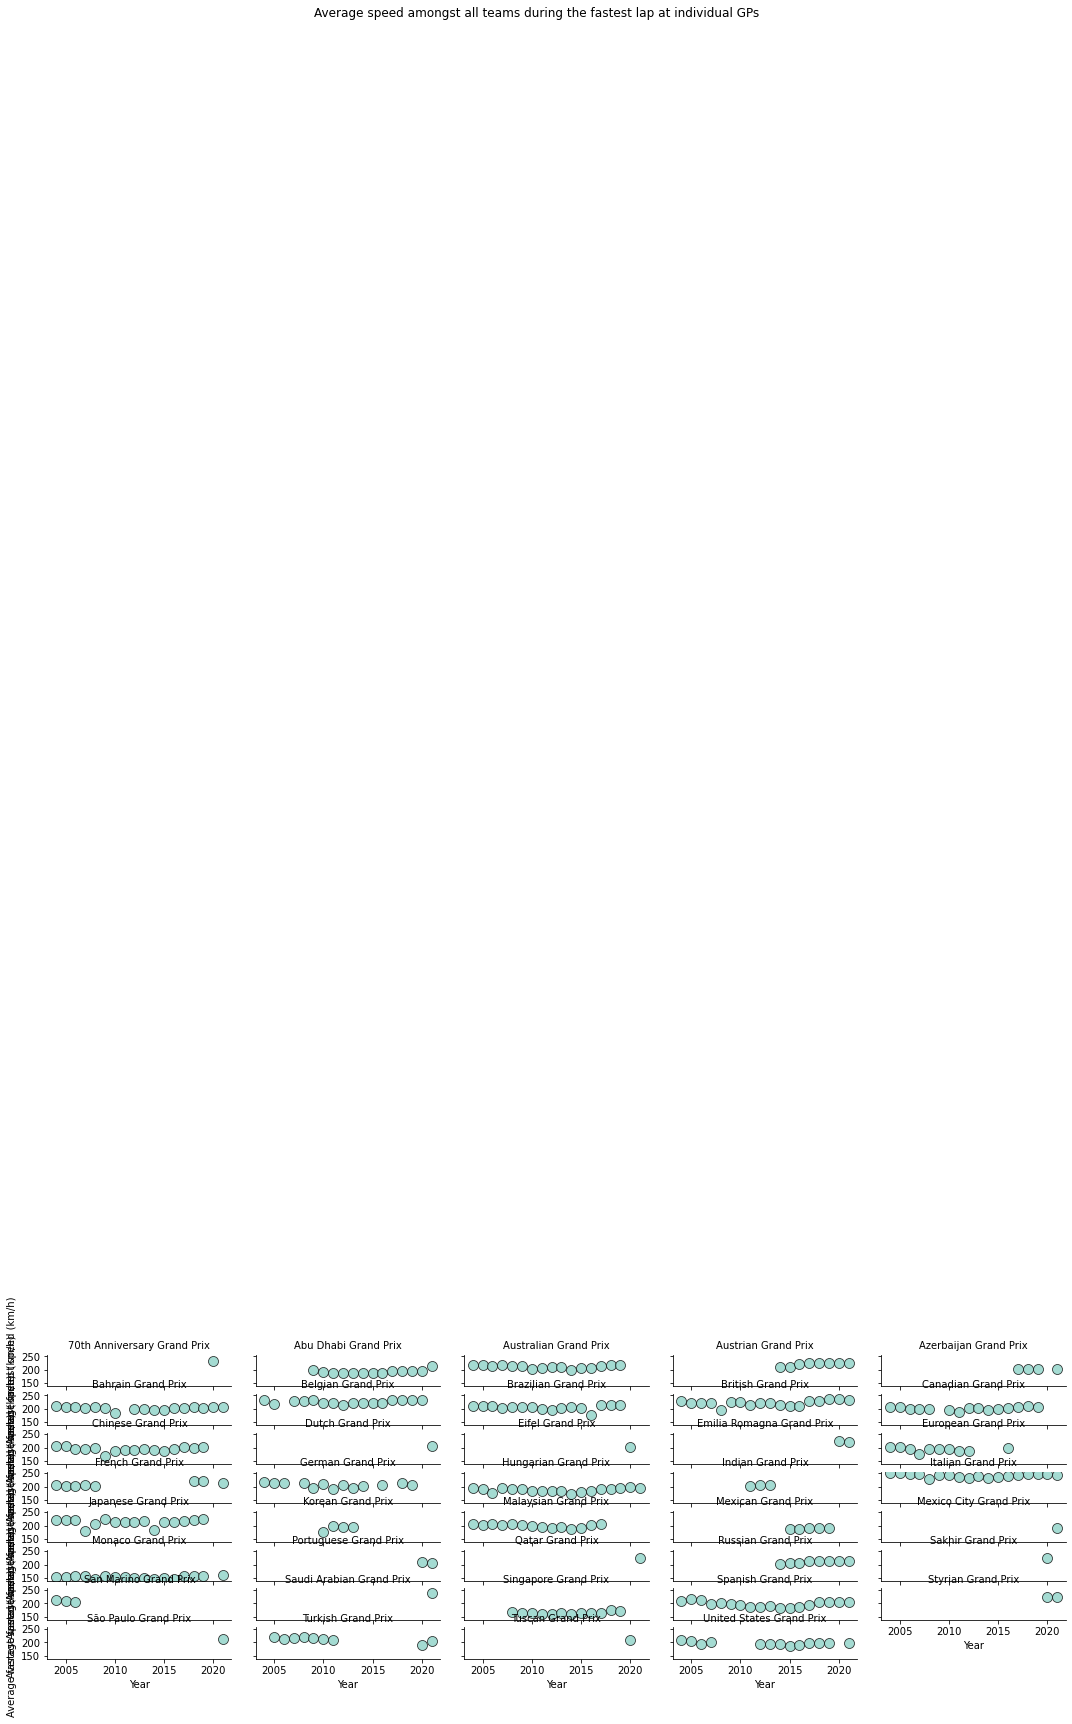

In [312]:
df_2004 = df[df['year'] >= 2004]
df_group_speed = df_2004.groupby(['gpName', 'year'])['fastestLapSpeed'].mean().to_frame().reset_index()

g = sb.FacetGrid(data = df_group_speed, col = 'gpName', col_wrap = 5)
g.map(plt.scatter, 'year', 'fastestLapSpeed', alpha = 0.8, linewidth = 0.8, edgecolor = 'black', s = 100)
g.set_titles("{col_name}")
g.set_xlabels('Year')
g.set_ylabels('Average fastest speed (km/h)')
plt.subplots_adjust(top = 0.2)
g.fig.suptitle('Average speed amongst all teams during the fastest lap at individual GPs')